![UCA](https://univ-cotedazur.fr/medias/fichier/uca-logo-ligne-mono-bleu_1594383427225-)
# **Lab session 1: Convex solvers**

## **Course: Optimization for data science**


#### Lab session proposed by
------------------------------------------------

### Rémy Sun


In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Unconstrained minimization

To start with, we are going to look at a simple quadratic unconstrained optimization problem. This is useful to build intuition on how the descent process functions as the loss landscape is very easy to understand.

Text(0.5, 1.0, 'Simple QP with cost X1**2+10X2**2')

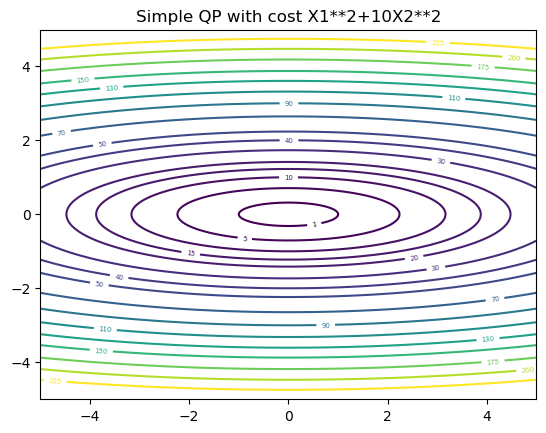

In [2]:
delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2= np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + 10*X2**2

fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Z, [1,5,10,15,20,30,40,50,70,90,110,130,150,175,200,225])
ax.clabel(CS, inline=True, fontsize=5)
ax.set_title('Simple QP with cost X1**2+10X2**2')

# Let's look at Gradient descent!

To begin, we will implement a standard gradient descent with fixed step size as you might have seen in deep learning classes.

Your code should add new points in the descent to the list x_seq, the visualization code provided expects x_seq to be a list of coordinates.

You can play with some different step sizes to understand the behavior of the model.

**Question: What are the issues of very large and very small step sizes?**

all done!


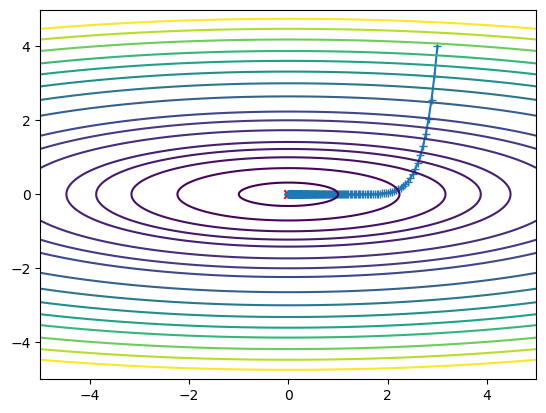

In [20]:
def cost(x1,x2):
#   return None
  return (x1**2 + 10*x2**2)


x_seq = [[3,4]]    # initial starting point

def grad(x1,x2):
    
#   return None, None
  return 2*x1, 20*x2


def stopping_criterion(dx1,dx2):
#   return None, None
    if (2*x1 + 20*x2)<.001:
        return (2*x1 + 20*x2)<.001


for _ in range(1000):
    x1,x2=x_seq[-1]
    dx1,dx2=grad(x1,x2)
    x1 = x1 - .01*dx1
    x2 = x2 - .01*dx2

    if stopping_criterion(dx1,dx2):
        print("all done!")
        break
#     step = None # .01
    step =  .01
#     x_seq.append([None,None])
    x_seq.append([x1,x2])


delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

fig, ax = plt.subplots()
ax.scatter(0,0,c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [1,5,10,15,20,30,40,50,70,90,110,130,150,175,200,225])

Now we can try exact line search to take less steps. Maybe you can leverage the convexity of the cost function to be slightly more efficient?

In [24]:
def cost(x1,x2):
    return (x1**2 + 10*x2**2)

x_seq = [[3,4]]

def grad(x1,x2):
    return 2*x1, 20*x2

def stopping_criterion(dx1,dx2):
#   return None, None
    if (2*x1 + 20*x2)<.001:
        return (2*x1 + 20*x2)<.001

def exact_line_search(x1,x2,dx,dy):
    step = 0
    if x1 < x1 -step* dx1 and x2< x2- step*x2 :
        step = step+.01       
    return step

for _ in range(100):
    x1 = []
    x2 = []
    x1,x2=x_seq[-1]
    dx1,dx2=grad(x1,x2)
    x1 = x1 - .01*dx1
    x2 = x2 - .01*dx2
    
    
    if stopping_criterion(dx1,dx2):
        print("all done!")
        break

    step = exact_line_search(x1,x2,dx1,dx2)
    print(step)
    x_seq.append([x1, x2])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

fig, ax = plt.subplots()
ax.scatter(0,0,c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [1,5,10,15,20,30,40,50,70,90,110,130,150,175,200,225])

UnboundLocalError: cannot access local variable 'step' where it is not associated with a value

all done


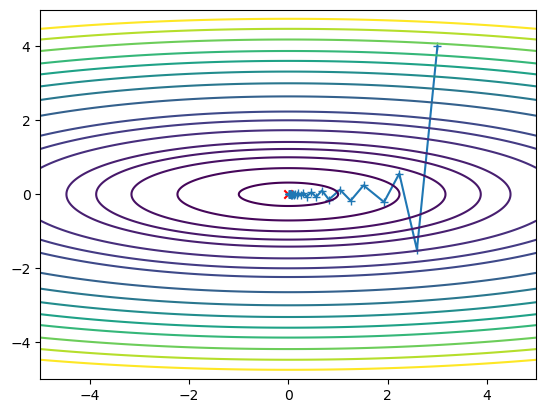

In [48]:
def cost(x1,x2):
  return x1**2 + 10*x2**2

x_seq = [[3,4]]

def grad(x1,x2):
  return 2*x1, 20*x2


def backtracking_line_search(x1,x2,dx1,dx2,alpha=0.3,beta=0.8):
  step=1
  while True:
    if cost(x1-step* dx1, x2-step * dx2) <cost(x1,x2) - alpha * step * (dx1* dx1 + dx2 * dx2):
      break
    else:
      step*=beta
  return step

for _ in range(100):
  x1,x2=x_seq[-1]
  dx1,dx2=grad(x1,x2)
  if (dx1**2 + dx2**2)< 10 **(-3):
    print("all done")
    break 

  step = backtracking_line_search(x1,x2,dx1,dx2)
  x_seq.append([x1 - step * dx1, x2 - step * dx2])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

fig, ax = plt.subplots()
ax.scatter(0,0,c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [1,5,10,15,20,30,40,50,70,90,110,130,150,175,200,225])

Exact line search is still quite expensive even like that. Fortunately we have cheap alternative in the form of backtracking line search!

In [40]:
import math 

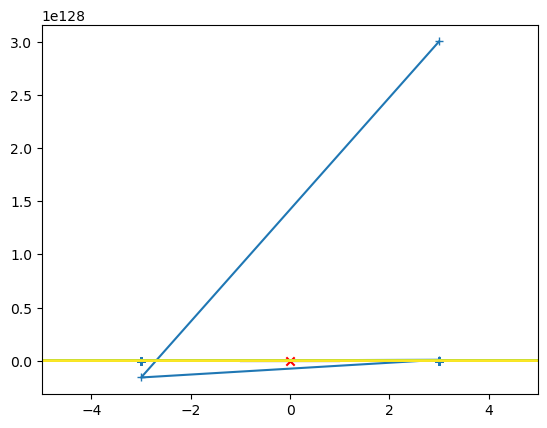

In [45]:
def cost(x1,x2):
    return (x1**2 + 10*x2**2)

x_seq = [[3,4]]

def grad(x1,x2):
    return 2*x1, 20*x2

def stopping_criterion(dx1,dx2):
#   return None, None
    if (2*x1 + 20*x2)<.001:
        return (2*x1 + 20*x2)<.001

def backtracking_line_search(x1,x2,dx1,dx2,alpha=0.3,beta=0.8):
    step = 1
    while True:
        if cost( x1 -step * dx1, x2 -step * dx2 )< cost( x1 , dx2 ) - alpha * step * (dx1*dx1+dx2*dx2):
            break
        else:
            step *= beta
    
    return step

for _ in range(100):
    x1,x2=x_seq[-1]
    dx1,dx2=grad(x1,x2)
    if math.sqrt(dx1**2 + dx2**2)<10**(-3):
        print("all done")
        break

#     if stopping_criterion(dx1,dx2):
#         print("all done!")
#         break

    step = backtracking_line_search(x1,x2,dx1,dx2)

    x_seq.append([x1 - step*dx1, x2 - step*dx2])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

fig, ax = plt.subplots()
ax.scatter(0,0,c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [1,5,10,15,20,30,40,50,70,90,110,130,150,175,200,225])

It was a bit too easy, so we are going to look at this non-quadratic (but still convex) problem now. The loss landscape is bit more complicated, but thankfully we can still visualize it thanks to the level lines!

Text(0.5, 1.0, 'Simple non-quadratic but still convex problem')

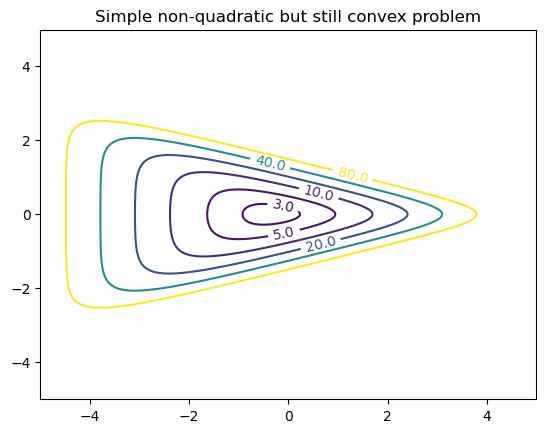

In [46]:
def cost(x1,x2):
  return np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Z, [0.1,1,3,5,10,20,40,80])
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simple non-quadratic but still convex problem')

Try to solve this problem using some form of gradient descent!

all done


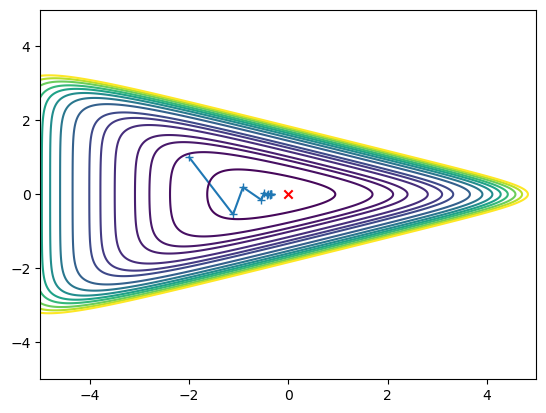

In [55]:
def cost(x1,x2):
  return np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)

x_seq = [[-2,1]]

def grad(x1,x2):
    dx1 = np.exp(x1+3*x2-0.1)+ +np.exp(x1-3*x2-0.1) -1*np.exp(-x1-0.1)
    dx2 = 3*np.exp(x1+3*x2-0.1)-3*np.exp(x1-3*x2-0.1) 
    return dx1, dx2


def backtracking_line_search(x1,x2,dx1,dx2,alpha=0.3,beta=0.8):
  step=1
  while True:
    if cost(x1-step* dx1, x2-step * dx2) <cost(x1,x2) - alpha * step * (dx1* dx1 + dx2 * dx2):
      break
    else:
      step*=beta
  return step

for _ in range(100):
  x1,x2=x_seq[-1]
  dx1,dx2=grad(x1,x2)
  if (dx1**2 + dx2**2)< 10 **(-3):
    print("all done")
    break 

  step = backtracking_line_search(x1,x2,dx1,dx2)
  x_seq.append([x1 - step * dx1, x2 - step * dx2])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

fig, ax = plt.subplots()
ax.scatter(0,0,c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [1,5,10,15,20,30,40,50,70,90,110,130,150,175,200,225])

all done
2.5593131886658247
[-0.35181090068638876, -0.0014102435512950784]


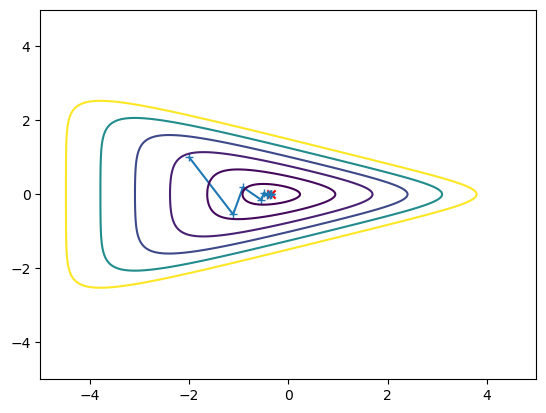

In [56]:



def cost(x1,x2):
  return np.exp(x1+3*x2-0.1)+np.exp(x1-3*x2-0.1)+np.exp(-x1-0.1)

x_seq = [[-2,1]]

def grad(x1,x2):
    dx1 = np.exp(x1+3*x2-0.1)+ +np.exp(x1-3*x2-0.1) -1*np.exp(-x1-0.1)
    dx2 = 3*np.exp(x1+3*x2-0.1)-3*np.exp(x1-3*x2-0.1) 
    return dx1, dx2


def backtracking_line_search(x1,x2,dx1,dx2,alpha=0.3,beta=0.8):
  step=1
  while True:
    if cost(x1-step* dx1, x2-step * dx2) <cost(x1,x2) - alpha * step * (dx1* dx1 + dx2 * dx2):
      break
    else:
      step*=beta
  return step

for _ in range(100):
  x1,x2=x_seq[-1]
  dx1,dx2=grad(x1,x2)
  if (dx1**2 + dx2**2)< 10 **(-3):
    print("all done")
    break 

  step = backtracking_line_search(x1,x2,dx1,dx2)
  x_seq.append([x1 - step * dx1, x2 - step * dx2])
delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

print(cost(x_seq[-1][0],x_seq[-1][1]))
print(x_seq[-1])
fig, ax = plt.subplots()
ax.scatter(x_seq[-1][0],x_seq[-1][1],c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [3,5,10,20,40,80])


## What about steepest descent?

Let's do steepest descent now. Incidentally, it coincides with standard gradient descent for the norm L2. The only difference lies in the fact that you need to separate the gradients dx from the descent direction sx.

all done!
9.151594300001733
[-2, 1]


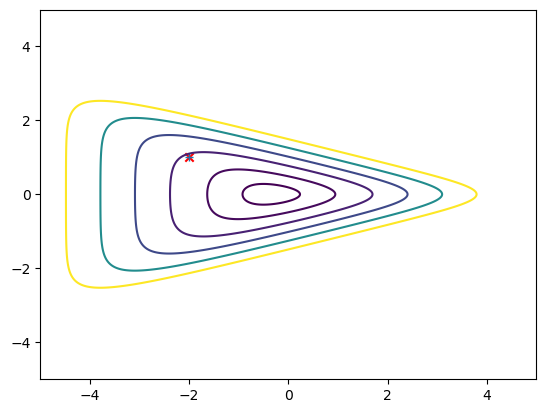

In [71]:
def cost(x1,x2):
    return np.exp(x1+3*x2-0.1) + np.exp(x1-3*x2-0.1)+ np.exp(-x1-0.1)

x_seq = [[-2,1]]

def grad(x1,x2):
    dx1 = np.exp(x1+3*x2-0.1) + np.exp(x1-3*x2-0.1)- np.exp(-x1-0.1)
    dx2 = 3*np.exp(x1+3*x2-0.1) -3* np.exp(x1-3*x2-0.1)
    return dx1, dx2

def stopping_criterion(dx1,dx2):
  return None, None




# def backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2,alpha=0.3,beta=0.8):
#   return None



def backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2,alpha=0.3,beta=0.8):
  step=1
  while True:
    if cost(x1 + step*sx1, x2 + step*sx2) <cost(x1,x2) - alpha * step * ((dx1)* (-sx1) + (dx2)* (-sx2)):
#     if cost(x1 + step*sx1, x2 + step*sx2) <cost(x1,x2) - alpha * step * (dx1* dx1 + dx2 * dx2):
    
      break
    else:
      step*=beta
  return step

for _ in range(1000):
    x1,x2=x_seq[-1]
    dx1,dx2=grad(x1,x2)

    if stopping_criterion(dx1,dx2):
        print("all done!")
        break

#     sx1,sx2=None, None
    sx1,sx2= -dx1,-dx2

    step = backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2)
    x_seq.append([x1 + step*sx1, x2 + step*sx2])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

print(cost(x_seq[-1][0],x_seq[-1][1]))
print(x_seq[-1])
fig, ax = plt.subplots()
ax.scatter(x_seq[-1][0],x_seq[-1][1],c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [3,5,10,20,40,80])


Now, try experimenting with a few other norms! You might want to look into different quadratic norms (that put more emphasis on x2 for instance!).

**Question: What is the impact of the quadratic norm chosen?**

In [ ]:
def cost(x1,x2):
  return None

x_seq = [[-2,1]]

def grad(x1,x2):
  return None

def stopping_criterion(dx1,dx2):
  return None, None

def backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2,alpha=0.5,beta=0.1):
  return None

for _ in range(100):
  x1,x2=x_seq[-1]
  dx1,dx2=grad(x1,x2)

  if stopping_criterion(dx1,dx2):
    print("all done!")
    break

  sx1, sx2 = None, None

  step = backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2)
  x_seq.append([None, None])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

print(cost(x_seq[-1][0],x_seq[-1][1]))
print(x_seq[-1])
fig, ax = plt.subplots()
ax.scatter(x_seq[-1][0],x_seq[-1][1],c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [3,5,10,20,40,80])


## The gold standard: Newton's descent


We now move on to implement Newton's descent. The main difference here lies in the computation of the descent direction (and the change in the stopping criterion).

**Question: Is there any noticeable difference with previous methods?**


In [ ]:
def cost(x1,x2):
  return None

x_seq = [[-2,1]]

def grad(x1,x2):
  return None, None

def stopping_criterion(dx1,dx2,hess):
  return None, None

def backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2,alpha=0.1,beta=0.1):
  return None

def hessian(x1,x2):
  return None

for _ in range(10):
  x1,x2=x_seq[-1]
  dx1,dx2=grad(x1,x2)

  hess=hessian(x1,x2)
  sx1,sx2= None, None

  if stopping_criterion(dx1,dx2,hess):
    print("all done!")
    break

  step = backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2)
  x_seq.append([None, None])

delta = 0.01
x1 = np.arange(-5.0, 5.0, delta)
x2 = np.arange(-5.0, 5.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = cost(X1,X2)

print(cost(x_seq[-1][0],x_seq[-1][1]))
print(x_seq[-1])
fig, ax = plt.subplots()
ax.scatter(x_seq[-1][0],x_seq[-1][1],c='red',marker="x")
ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
CS = ax.contour(X1, X2, Z, [3,5,10,20,40,80])

# Inequality constrained convex problems

We now move on to the more complicated inequality constrained case. For simplicity, we will work on a simple linear program with inequality constraints.

**Question: Visually, where do you think the minimum lies?**

In [ ]:
delta = 0.01
x1 = np.arange(-7.0, 7.0, delta)
x2 = np.arange(-7.0, 7.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = 3*X1 + 2*X2
Z1 = X1 + X2 - 5
Z2 = -2*X1 + X2 - 8
Z3 = X1 - 3*  X2 - 2

fig, ax = plt.subplots()
ax.contour(X1, X2, Z1, [0])
ax.contour(X1, X2, Z2, [0])
ax.contour(X1, X2, Z3, [0])

CS=ax.contour(X1, X2, Z, [-15,-10,-5,0,5,10])

ax.clabel(CS, inline=True, fontsize=10)

It is not immediately obvious how we can deal with the inequality constraints using descent methods. Thankfully, we can rely on the barrier functions!

It is a complicated loss landscape with the barrier functions, but can still use the level lines to understand where the minimum roughly lies.

**Question: Where is the minimum now? Is it the same as before?**

In [ ]:
delta = 0.01
x1 = np.arange(-7.0, 7.0, delta)
x2 = np.arange(-7.0, 7.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Z = (3*X1 + 2*X2)*0.25 - np.log(5-X1-X2) - np.log(8+2*X1-X2) - np.log(2-X1+3*X2)
Z1 = X1 + X2 - 5
Z2 = -2*X1 + X2 - 8
Z3 = X1 - 3*  X2 - 2

fig, ax = plt.subplots()
ax.contour(X1, X2, Z1, [0])
ax.contour(X1, X2, Z2, [0])
ax.contour(X1, X2, Z3, [0])

CS=ax.contour(X1, X2, Z, [-19.5,-15,-7,-5,0,5,10])

ax.clabel(CS, inline=True, fontsize=10)

## Barrier method

We can leverage a sequence of barrier functions to solve the true linear program up to an error factor. Try to implement the barrier function now!

**Question: Can you describe the successive solutions found by the algorithm?**

In [ ]:
mu = 10
t = 0.5

x_seq = [[0,0]]

for _ in range(100):

  def cost(x1,x2):
    return None

  def grad(x1,x2):
    return None, None

  def stopping_criterion(dx1,dx2, hess):
    return None, None

  def hessian(x1,x2):
    return None

  def backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2,alpha=0.1,beta=0.1):
    return None

  for _ in range(100):
    x1,x2=x_seq[-1]
    dx1,dx2=grad(x1,x2)

    hess=hessian(x1,x2)
    sx1,sx2= None, None

    if stopping_criterion(dx1,dx2,hessian):
      print("all done!")
      break

    step = backtracking_line_search(x1,x2,dx1,dx2,sx1,sx2)
    x_seq.append([None, None])

  delta = 0.01
  x1 = np.arange(-7.0, 7.0, delta)
  x2 = np.arange(-7.0, 7.0, delta)
  X1, X2 = np.meshgrid(x1, x2)
  Z = cost(X1,X2)
  Z1 = X1 + X2 - 5
  Z2 = -2*X1 + X2 - 8
  Z3 = X1 - 3*  X2 - 2

  fig, ax = plt.subplots()
  ax.scatter(x_seq[-1][0],x_seq[-1][1],c='red',marker="x")
  ax.plot([z[0] for z in x_seq],[z[1] for z in x_seq],marker='+')
  ax.contour(X1, X2, Z1, [0])
  ax.contour(X1, X2, Z2, [0])
  ax.contour(X1, X2, Z3, [0])

  CS=ax.contour(X1, X2, Z, [-20*t,-15*t,-10*t,-5*t,0*t,5*t,10*t])

  ax.clabel(CS, inline=True, fontsize=10)

  # Write up the end of outer loop instructions for the next iteration

# Meanwhile, in real life...

There are, in fact, ready made solvers for convex problems nowadays: you do not need to re-implement everything from scratch everytime!

Below is an example of a convex problem solved by the cvxpy python library.

You can solve the previous problems by adapting the provided code!

**Question: Do your previous solutions match cvxpy's solutions?**

In [ ]:
# The cvxpy library is the go-to convex solver for python!
import cvxpy as cp

# We are minimizing two variables
x1, x2 = cp.Variable(), cp.Variable()

# We minimize some convex cost function of x1 and x2
objective = cp.Minimize(x1**2 +3*x2)

# And have some constraints that follow convex conditions
constraints = [x1 + 3*x2 <= 1,
               x2**4 <= 20,
               x1 - 1*x2 == 8]

# We put everything into a convex problem...
problem = cp.Problem(objective, constraints)

# ... and hit solve!
problem.solve()

# Which gives a solution.
print("The minimal cost is",problem.value)
print("With x1=", x1.value, ", x2=", x2.value)